# E-Commerce Shipping Dataset Analysis Project


### About Data

I chose a dataset on Kaggle consisting of e-commerce delivery data. [ More information about data: E-commerce Shipping Dataset](https://www.kaggle.com/datasets/prachi13/customer-analytics).
Specifically, the reason why I chose e-commerce was because I had worked in an e-commerce sektor before. And I wanted to understand how an e-commerce company interprets data science methods.

We have a dataset that include e-commerce shipping data. The dataset consist of 12 columns and 10999 index. 
It contains order and reacing on-time delivery information of 10999 customers. The target is if the customer orders reach on-time or not.

When we examine the data, reaching on time of the customer orders depend on many **features.** And our goal is to try to predict likelihood by using specific machine learning method if orders reach on-time or not and then is to measure model success.

In [2]:
#we import the libraries we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#we also import warning library because of some warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the data and also changing the column name

data=pd.read_csv("e-commerce_shipping.csv")
column_name=["customer_id","warehouse_type","shipment_type","customer_call_number","customer_rating","product_cost","prior_purchase","product_importance","gender","discount","weight_as_gram","reaching_on_time"]
data.columns=column_name
data.head(10)

,customer_id,warehouse_type,shipment_type,customer_call_number,customer_rating,product_cost,prior_purchase,product_importance,gender,discount,weight_as_gram,reaching_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [4]:
# we have 12 columns and also name of columns is in below
print("Number of columns:", len(data.columns))
print(data.columns)

Number of columns: 12
Index(['customer_id', 'warehouse_type', 'shipment_type',
       'customer_call_number', 'customer_rating', 'product_cost',
       'prior_purchase', 'product_importance', 'gender', 'discount',
       'weight_as_gram', 'reaching_on_time'],
      dtype='object')


In [5]:
# getting more information about the data
# data has 4 object variable columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10999 non-null  int64 
 1   warehouse_type        10999 non-null  object
 2   shipment_type         10999 non-null  object
 3   customer_call_number  10999 non-null  int64 
 4   customer_rating       10999 non-null  int64 
 5   product_cost          10999 non-null  int64 
 6   prior_purchase        10999 non-null  int64 
 7   product_importance    10999 non-null  object
 8   gender                10999 non-null  object
 9   discount              10999 non-null  int64 
 10  weight_as_gram        10999 non-null  int64 
 11  reaching_on_time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
# let's see some statistical information

data.describe()

,customer_id,customer_call_number,customer_rating,product_cost,prior_purchase,discount,weight_as_gram,reaching_on_time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**Before moving on data analysis, let's see if there are any null values in big data. If we have null data, we must fill the data or drop the null values**

In [7]:
#there aren't any null values in big data
data.isnull().sum()

customer_id             0
warehouse_type          0
shipment_type           0
customer_call_number    0
customer_rating         0
product_cost            0
prior_purchase          0
product_importance      0
gender                  0
discount                0
weight_as_gram          0
reaching_on_time        0
dtype: int64

In [8]:
#data.pivot_table(values="customer_rating",columns="gender", index="warehouse_type",aggfunc="mean" ).sort_values(by=["F","M"],ascending=False)

Text(0.5, 1.0, 'Correlation')

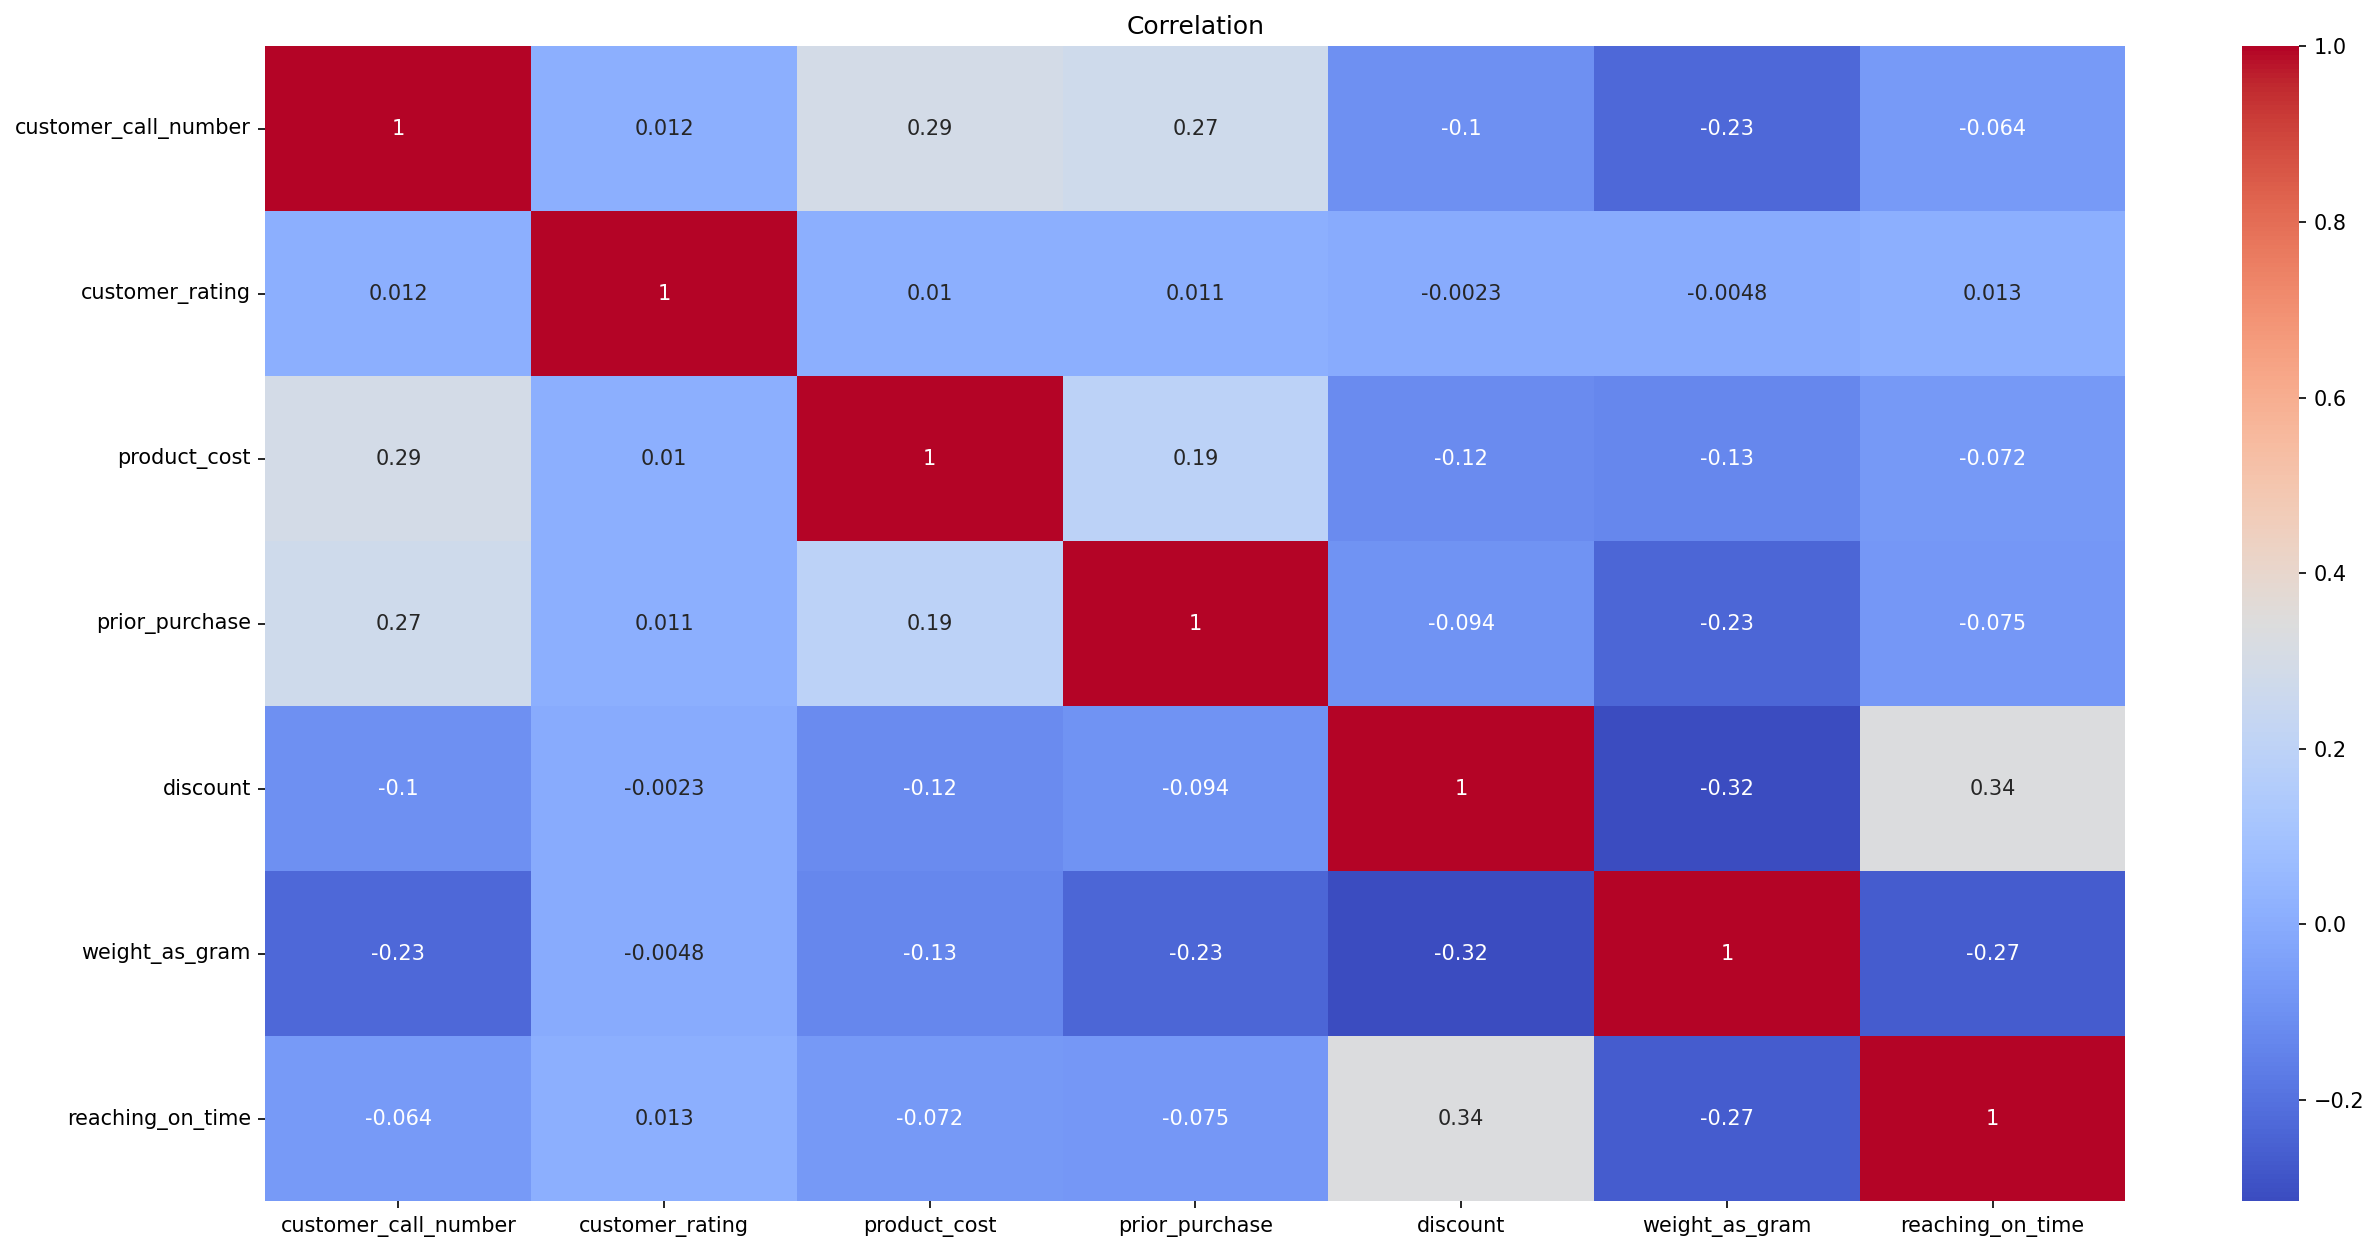

In [9]:
#let's plot "corelation" to see relations between variables in columns
plt.figure(dpi=150,figsize=(20,10))
data_corr=data.drop("customer_id",axis=1)
sns.heatmap(data_corr.corr(method="spearman", numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation")

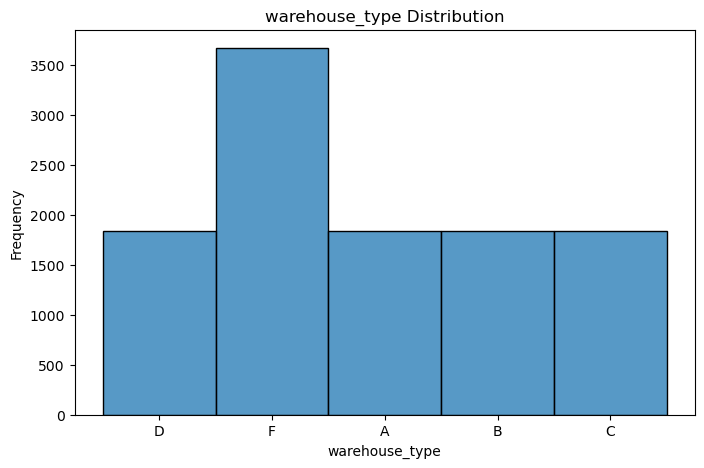

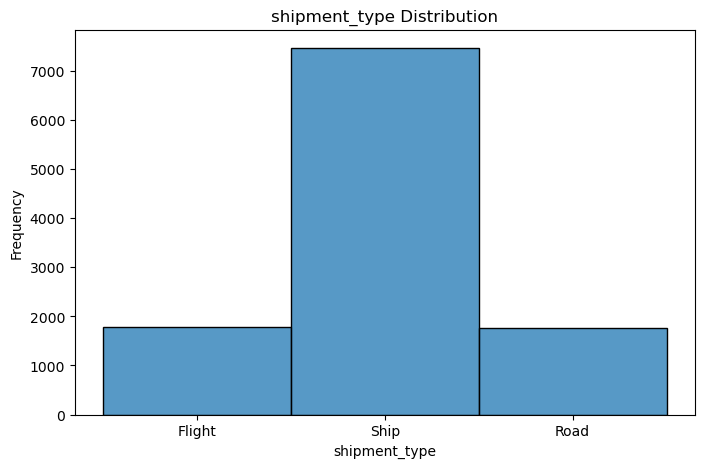

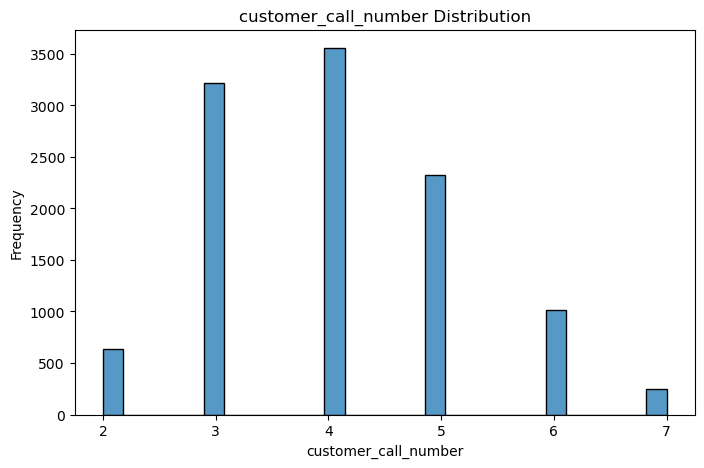

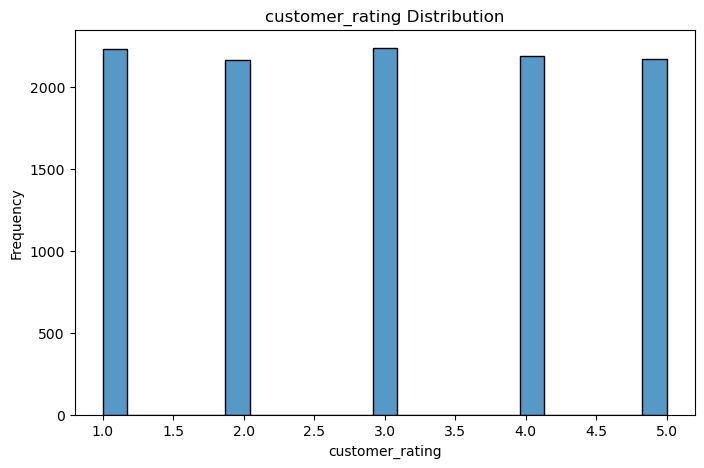

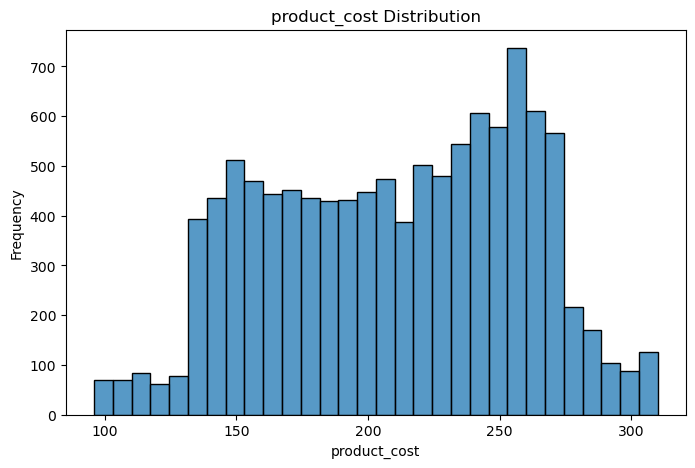

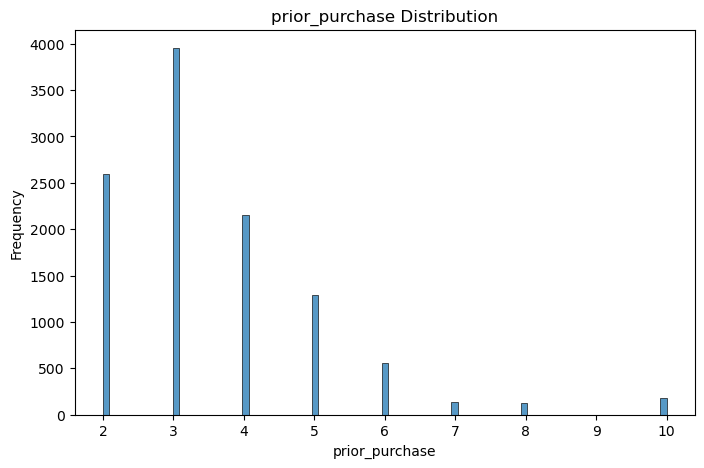

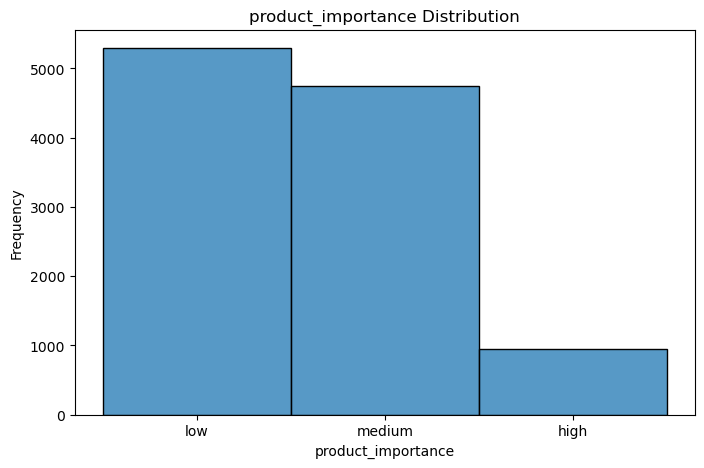

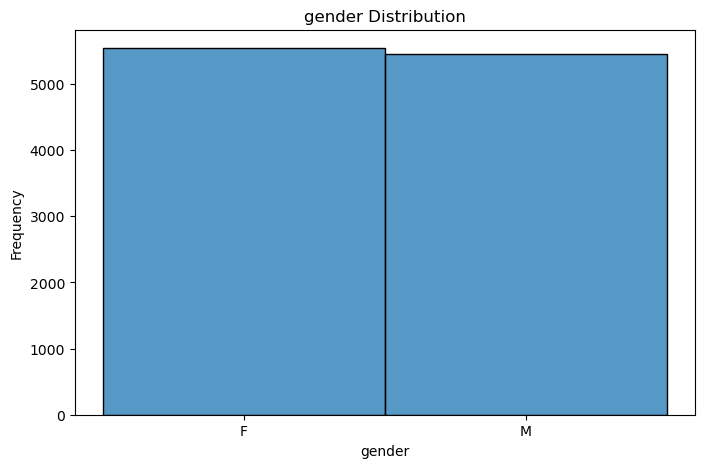

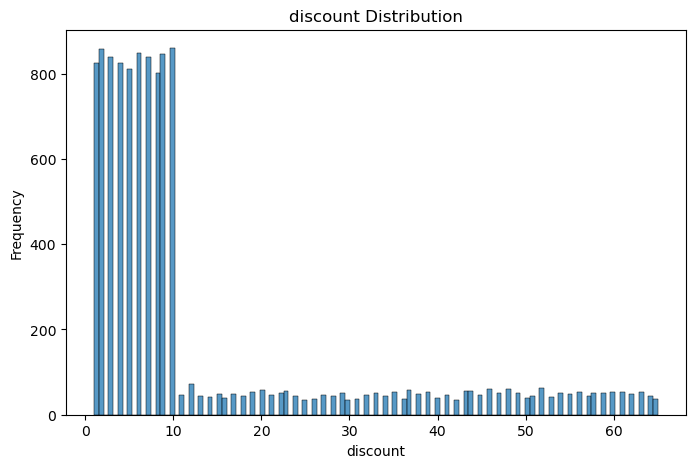

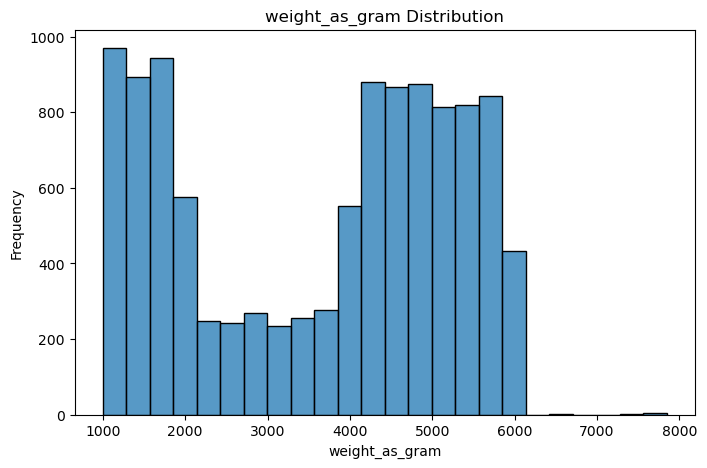

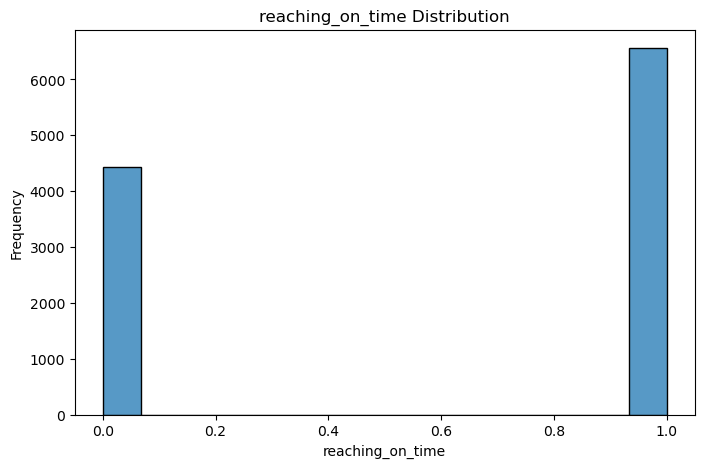

In [10]:
#In addition, let's see histogram plot for our all columns according to frequency

columns_1=data.columns[1:]

for column in columns_1:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=data[column])
    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.show()
     

warehouse_type
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


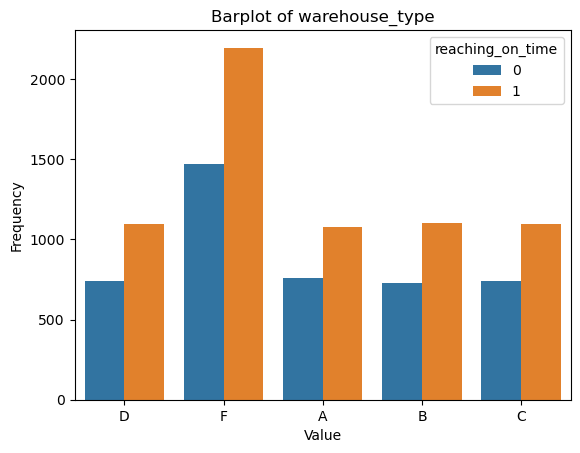

shipment_type
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


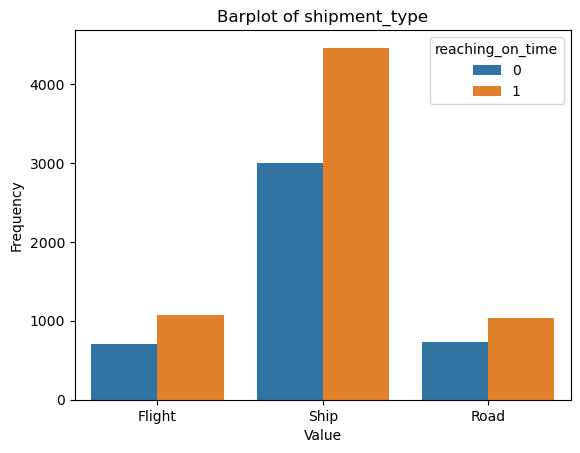

product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


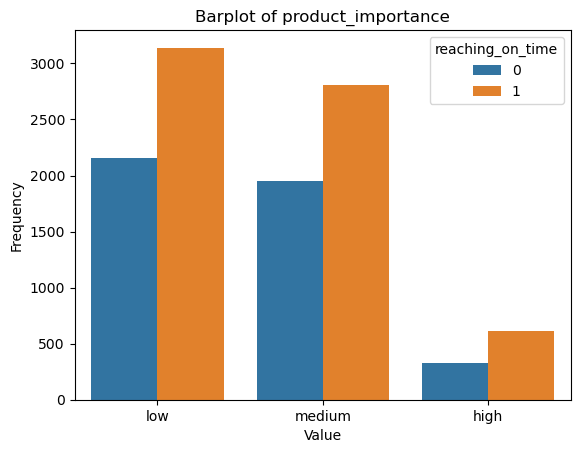

gender
F    5545
M    5454
Name: count, dtype: int64


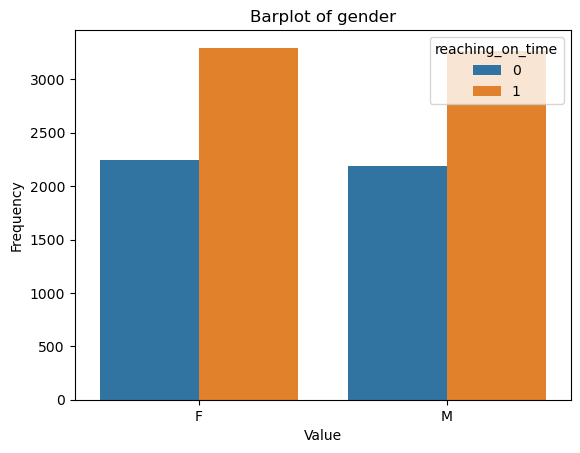

In [11]:
#according to warehouse type, 

columns=data.select_dtypes(include="object")
#print(data.warehouse_type.value_counts())

#sns.countplot(x=data['warehouse_type'], hue=data['reaching_on_time'])


for column in columns:
    print(data[column].value_counts())
    sns.countplot(x=data[column], hue=data['reaching_on_time'])

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Barplot of {column}')
    plt.show()

**As we said above, we haven't got any not null values so we can move on the data analysis.**

**When we look at the data, dataset result(reaching on time=y) consists of [0,1] values. So 1 values indicates reaching on time, 0 values indicates not reaching on time of customer orders. This is an classification problem. And target values(reaching on time=y) depends on many feature(x values).**

***First of all, let's determine object columns and then trasform integer form. For this, we use get_dummies() function of pandas***

In [12]:
# determining the object columns and transforming the interger values
data.dtypes

customer_id              int64
warehouse_type          object
shipment_type           object
customer_call_number     int64
customer_rating          int64
product_cost             int64
prior_purchase           int64
product_importance      object
gender                  object
discount                 int64
weight_as_gram           int64
reaching_on_time         int64
dtype: object

In [13]:
#finding number of unique values 
print("Number of unique values for product importance:", data.product_importance.nunique())
print("Number of unique values for shipment type:", data.shipment_type.nunique())
print("Number of unique values for warehouse type:", data.warehouse_type.nunique())

Number of unique values for product importance: 3
Number of unique values for shipment type: 3
Number of unique values for warehouse type: 5


In [14]:
#also determining the unique values
print("Product importance unique values:", data["product_importance"].unique())
print("Shipment type unique values:",data.shipment_type.unique())
print("Warehouse type unique values:",data.warehouse_type.unique())
print("Gender values:",data.gender.unique())

Product importance unique values: ['low' 'medium' 'high']
Shipment type unique values: ['Flight' 'Ship' 'Road']
Warehouse type unique values: ['D' 'F' 'A' 'B' 'C']
Gender values: ['F' 'M']


In [15]:
#our target variable has 2 values: 0(not reaching on time) and 1(reaching on time)
data["reaching_on_time"].unique()

array([1, 0])

In [16]:
#extending the visibility size of columns
pd.options.display.max_columns=30

**as we said above, let's transform to integer form from object form. for this, we can write "for loop"**

In [17]:
categorical_columns=[]

for column in data.columns:
    # controlling the data type and chosing the object columns 
    if data[column].dtype == 'object':
        categorical_columns.append(column)
               
print(categorical_columns)
        
    
#applying the get_dummies function by using categorical_columns list
for column in categorical_columns:
    dummies=pd.get_dummies(data[column],prefix=column,dtype="int",drop_first=True) 
    data=pd.concat([data,dummies],axis=1)
            
data = data.drop(categorical_columns, axis=1)
data

['warehouse_type', 'shipment_type', 'product_importance', 'gender']


,customer_id,customer_call_number,customer_rating,product_cost,prior_purchase,discount,weight_as_gram,reaching_on_time,warehouse_type_B,warehouse_type_C,warehouse_type_D,warehouse_type_F,shipment_type_Road,shipment_type_Ship,product_importance_low,product_importance_medium,gender_M
0,1,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,2,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,3,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,4,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,5,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1,0,0,0,0,0,1,0,1,0
10995,10996,4,1,232,5,6,1247,0,1,0,0,0,0,1,0,1,0
10996,10997,5,4,242,5,4,1155,0,0,1,0,0,0,1,1,0,0
10997,10998,5,2,223,6,2,1210,0,0,0,0,1,0,1,0,1,1


In [18]:
#as we can see, the dataset fully consist of integer variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   customer_id                10999 non-null  int64
 1   customer_call_number       10999 non-null  int64
 2   customer_rating            10999 non-null  int64
 3   product_cost               10999 non-null  int64
 4   prior_purchase             10999 non-null  int64
 5   discount                   10999 non-null  int64
 6   weight_as_gram             10999 non-null  int64
 7   reaching_on_time           10999 non-null  int64
 8   warehouse_type_B           10999 non-null  int64
 9   warehouse_type_C           10999 non-null  int64
 10  warehouse_type_D           10999 non-null  int64
 11  warehouse_type_F           10999 non-null  int64
 12  shipment_type_Road         10999 non-null  int64
 13  shipment_type_Ship         10999 non-null  int64
 14  product_importance_low

In [19]:
# Let's remove "customer id" column so that it does not affect the objective function
data=data.drop("customer_id",axis=1)
data

,customer_call_number,customer_rating,product_cost,prior_purchase,discount,weight_as_gram,reaching_on_time,warehouse_type_B,warehouse_type_C,warehouse_type_D,warehouse_type_F,shipment_type_Road,shipment_type_Ship,product_importance_low,product_importance_medium,gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,0,0,0,0,1,0,1,0
10995,4,1,232,5,6,1247,0,1,0,0,0,0,1,0,1,0
10996,5,4,242,5,4,1155,0,0,1,0,0,0,1,1,0,0
10997,5,2,223,6,2,1210,0,0,0,0,1,0,1,0,1,1


Our dataset is ready for numeric form. So, we can move on machine learning step.

During the process, we can follow the steps below:

1. Firstly, decide which classification methods you use? -> We use KNN, Naive Bayes, Logistic Regression

2. According to the methods you use, import the required libraries 

3. Split x and y variables

4. Split x and y variables into train and test 

5. Create an object according to the method we chose and fit the training data

6. Make predictions based on the model that created with test data.

7. Measure the success of our predictions and true values

6. Finally, create confusion matrix and analyze model success again


# K-Nearest Neighbors Method

In [20]:
#import KNN method
from sklearn.neighbors import KNeighborsClassifier

#create an object according to KNN method
knn=KNeighborsClassifier(n_neighbors=100,metric='minkowski')

In [21]:
#import train_test_split() method
from sklearn.model_selection import train_test_split

#split x and y variable

x=data.drop("reaching_on_time",axis=1)

y=data["reaching_on_time"]

In [22]:
#y variables
y.values

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
#x features
x.head()

,customer_call_number,customer_rating,product_cost,prior_purchase,discount,weight_as_gram,warehouse_type_B,warehouse_type_C,warehouse_type_D,warehouse_type_F,shipment_type_Road,shipment_type_Ship,product_importance_low,product_importance_medium,gender_M
0,4,2,177,3,44,1233,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,0,1,0,0,0,0,0,1,0


In [24]:
#we can separate as x train, x test, y train and y test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1, stratify=y)

In [25]:
# fit with x_train and y_train variables

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [26]:
y_pred=knn.predict(x_test)
y_pred[:20]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [27]:
#let's look at some y prediction variables
list(zip(y_test,y_pred))[:20]

[(1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

In [28]:
#let's see model success with score metrics
print(knn.score(x_test,y_test))

#also, let's see all score metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.6690909090909091
              precision    recall  f1-score   support

           0       0.56      0.89      0.68       887
           1       0.87      0.52      0.65      1313

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.74      0.67      0.67      2200



# Naive Bayes Model

In [29]:
#import required libraries
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

In [30]:
#fit the x_train and y_train data
nb.fit(x_train,y_train)

GaussianNB()

In [31]:
# let's predict test variables
y_prediction=nb.predict(x_test)
list(zip(y_test,y_prediction))[0:20]

[(1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0)]

In [32]:
# observe score metric
nb.score(x_test,y_test)

0.6468181818181818

In [33]:
#pay attention "accuracy"
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69       887
           1       0.97      0.42      0.59      1313

    accuracy                           0.65      2200
   macro avg       0.75      0.70      0.64      2200
weighted avg       0.79      0.65      0.63      2200



# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_model=LogisticRegression(max_iter=1000, penalty="none")

In [36]:
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [37]:
# beta variables
log_model.coef_

array([[ 0.00044493,  0.00306871, -0.00066671,  0.00043482,  0.12272828,
        -0.00015264,  0.00016125,  0.00012805,  0.00015535,  0.00037044,
         0.00012393,  0.00056729,  0.00021324,  0.00031226,  0.00056238]])

In [38]:
#beta0 variable
log_model.intercept_

array([0.00089415])

In [39]:
#np.array(y_test)

In [40]:
y_prediction_=log_model.predict(x_test)
#np.array(y_prediction_).reshape(-1,1)
list(zip(y_test, y_prediction_))[0:20]

[(1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0)]

In [41]:
#import confusion matrix library for considering the prediction
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

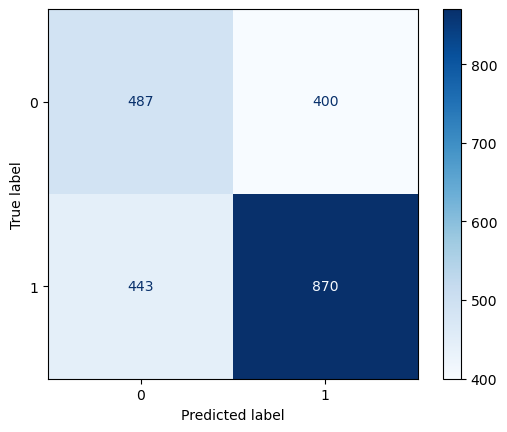

In [42]:
cf_matrix=confusion_matrix(y_test,y_prediction_)
ConfusionMatrixDisplay(cf_matrix).plot(cmap="Blues")
plt.show()

In [43]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test,y_prediction_))
print("Precision:", metrics.precision_score(y_test,y_prediction_))
print("Recall:", metrics.recall_score(y_test,y_prediction_))

Accuracy: 0.6168181818181818
Precision: 0.6850393700787402
Recall: 0.6626047220106626


In [44]:
log_model.score(x_test,y_test)

0.6168181818181818

In [45]:
print(classification_report(y_test, y_prediction_))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54       887
           1       0.69      0.66      0.67      1313

    accuracy                           0.62      2200
   macro avg       0.60      0.61      0.60      2200
weighted avg       0.62      0.62      0.62      2200



In [46]:
#1 ya da 0 sınıfına yerleştirilme ihtimalini görelim 
y_pred_proba=log_model.predict_proba(x_test)
y_pred_proba

array([[0.69744205, 0.30255795],
       [0.00140434, 0.99859566],
       [0.02776012, 0.97223988],
       ...,
       [0.67356304, 0.32643696],
       [0.014274  , 0.985726  ],
       [0.67284534, 0.32715466]])

In [47]:
print(y_pred_proba.shape)
y_pred_proba=y_pred_proba[: ,1:]

(2200, 2)


In [48]:
print(y_test.shape)
print(y_pred_proba)

(2200,)
[[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]


***Roc Curve plots TP versus FP values for different threshold values. If the area under it is close to 1, our model has made a good classification.***

In [49]:
#threshold=%50 (according to default likelihood)
fpr=400/(400+487)
tpr=870/(870+443)
print(fpr)
print(tpr)

0.4509582863585118
0.6626047220106626


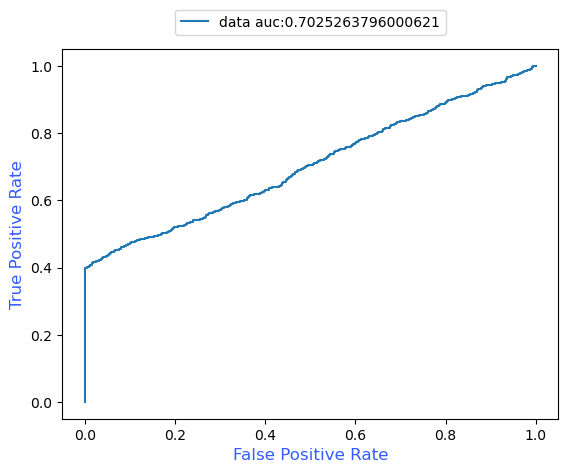

In [50]:
# let's draw the roc curve and calculate the roc curve score
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label="data auc:"+str(auc))
plt.legend(loc="lower center",bbox_to_anchor=(0.5,1.02))
plt.xlabel("False Positive Rate", fontsize=12, color="#335BFF")
plt.ylabel("True Positive Rate",fontsize=12,color="#335BFF")
plt.show()

**roc curve auc** variable is %70. Our model performans is close to perfect.

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


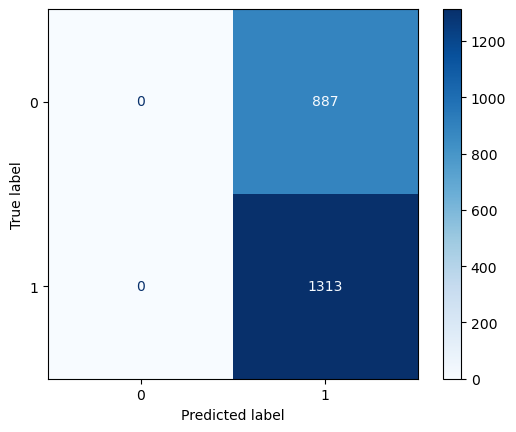

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


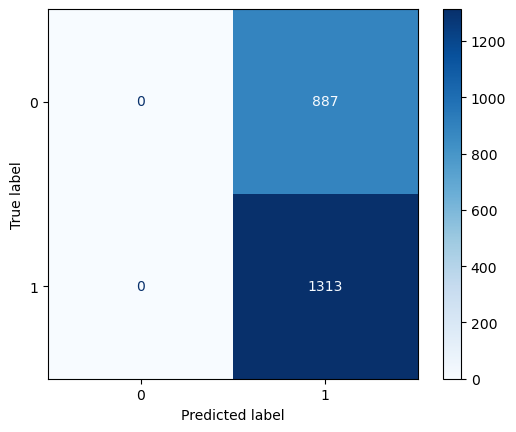

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


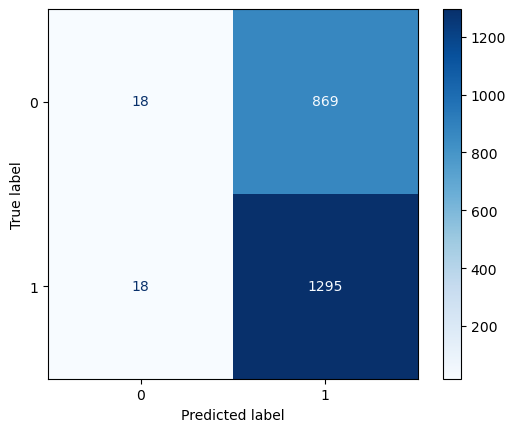

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


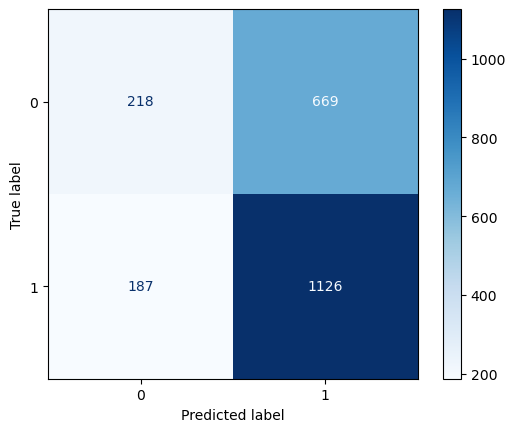

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


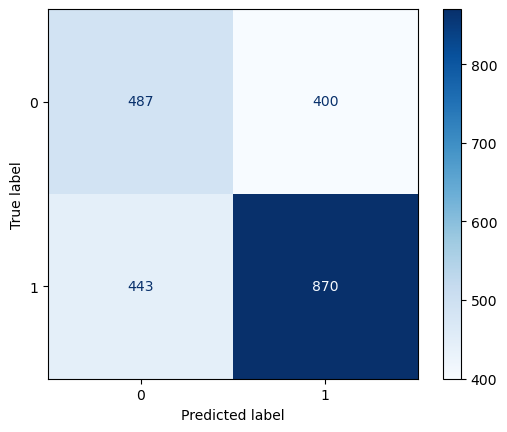

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


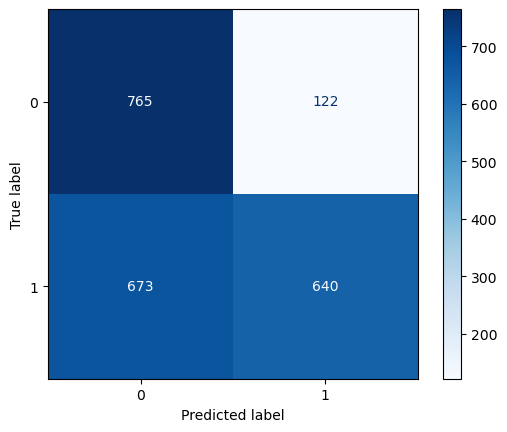

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


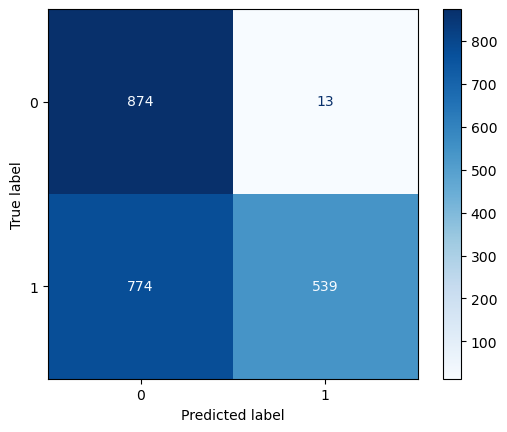

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


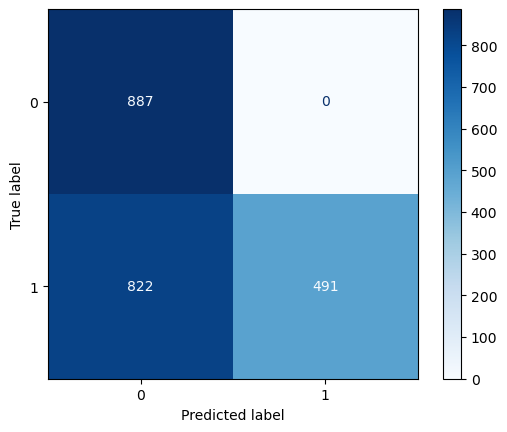

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


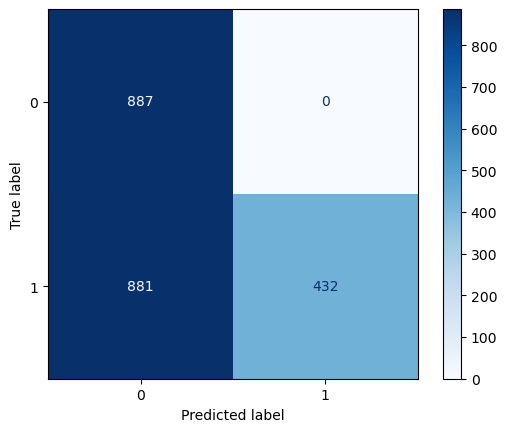

y_pred_proba: [[0.30255795]
 [0.99859566]
 [0.97223988]
 ...
 [0.32643696]
 [0.985726  ]
 [0.32715466]]
y_pred: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


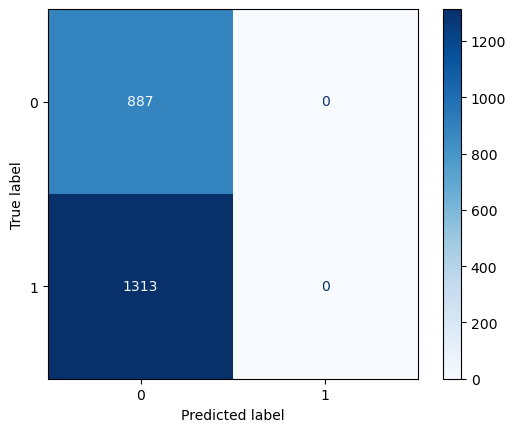

In [52]:
# it creates a confision matrix for random thresholds between 0 and 1 and calculates fpr and tpr rates.

thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for threshold in thresholds:
    y_pred_proba=log_model.predict_proba(x_test)
    y_pred_proba=y_pred_proba[:,1:]
    print("y_pred_proba:", y_pred_proba)
    
    y_pred=(y_pred_proba>threshold).astype("float")
    print("y_pred:", y_pred)
    

    cf_matrix=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cf_matrix).plot(cmap="Blues")
    plt.show()




# CONCLUSION

When we look at the classification accuracy reports for each model, KNN model accuracy is %67, Naive Bayes accuracy is %65 and Logistic Regression is %61. According to result, it can be seen that best model accuracy is KNN model. And it is follewed by Naive Bayes model.